<a href="https://colab.research.google.com/github/nicoyogis/TUBES-ML/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/abdallahalidev/plantvillage-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nicoyogisyahputro
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [00:22<00:00, 97.8MB/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split_folders
import splitfolders

In [ ]:
input_folder="/content/drive/MyDrive/tubesML/kelompok" 
base_dir="/content/drive/MyDrive/tubesML/dataset_split"

In [ ]:
%cd /content/drive/MyDrive/tubesML/kelompok
!ls -a

In [ ]:

splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.7, 0.3))

Copying files: 3852 files [01:00, 64.02 files/s]


In [4]:
import os
base_dir = '/content/drive/MyDrive/tubesML/dataset_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_cercospora_dir = os.path.join(train_dir, 'cercospora')
train_commonrust_dir = os.path.join(train_dir, 'commonrust')
train_normal_dir = os.path.join(train_dir, 'normal')
train_northernleaf_dir = os.path.join(train_dir, 'northernleafblight')

validation_cercospora_dir = os.path.join(validation_dir, 'cercospora')
validation_commonrust_dir = os.path.join(validation_dir, 'commonrust')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_northernleaf_dir = os.path.join(validation_dir, 'northernleafblight')

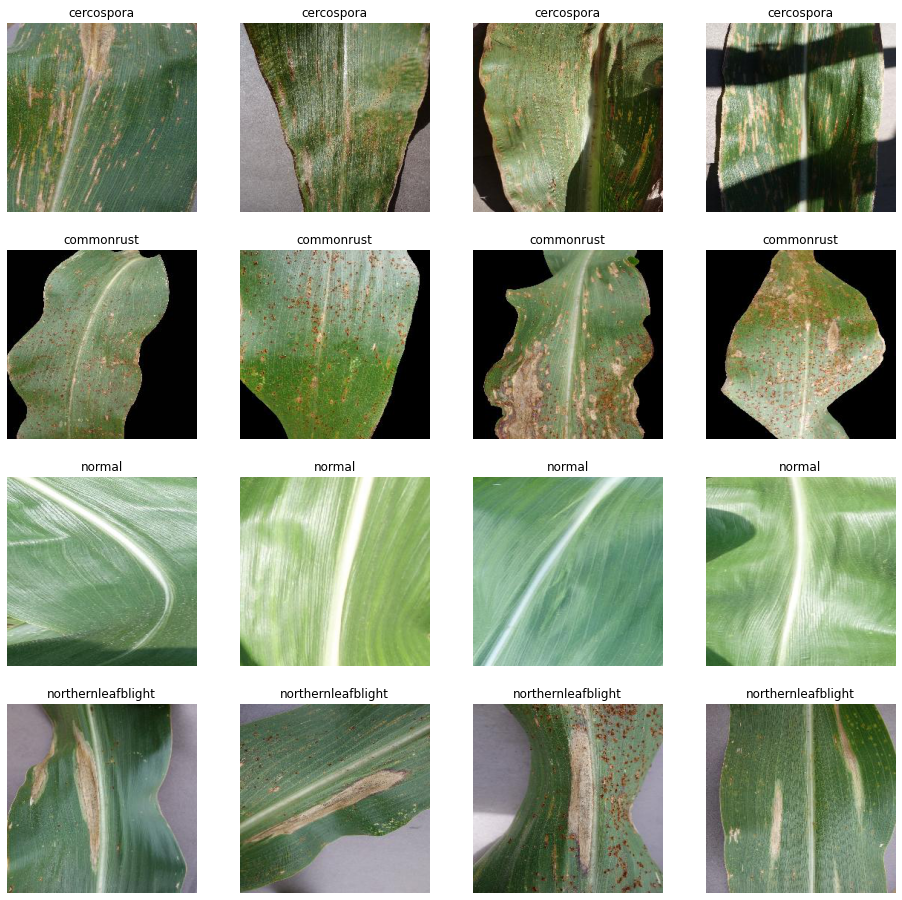

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
cercospora_img = [os.path.join(train_cercospora_dir, fname) 
                for fname in os.listdir(train_cercospora_dir)[pic_index-4:pic_index]]
commonrust_img  = [os.path.join(train_commonrust_dir, fname) 
                for fname in os.listdir(train_commonrust_dir)[pic_index-4:pic_index]]
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
northernleaf_img  = [os.path.join(train_northernleaf_dir, fname) 
                for fname in os.listdir(train_northernleaf_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(cercospora_img+commonrust_img+normal_img+northernleaf_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [5]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg"and".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [6]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg"and".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [5]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1769, 150, 150, 3)
Train Label =  (1769,)
Validation Data =  (760, 150, 150, 3)
Validation Label =  (760,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [130 125 126]
Data setelah di-normalisasi  [0.50980395 0.49019608 0.49411765]


In [8]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label)

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_val)

Label sebelum di-encoder  ['cercospora' 'cercospora' 'cercospora' ... 'normal' 'normal' 'normal']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten , GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image 
import cv2

In [9]:
model = Sequential()
model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [10]:
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [17]:
H = model.fit(x_train, y_train, batch_size=50, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
36/36 [==============================] - 1s 36ms/step - loss: 1.1456 - accuracy: 0.5562 - val_loss: 0.8795 - val_accuracy: 0.7987
Epoch 2/100
36/36 [==============================] - 1s 22ms/step - loss: 0.6611 - accuracy: 0.7908 - val_loss: 0.4259 - val_accuracy: 0.8171
Epoch 3/100
36/36 [==============================] - 1s 21ms/step - loss: 0.4336 - accuracy: 0.8168 - val_loss: 0.3623 - val_accuracy: 0.8342
Epoch 4/100
36/36 [==============================] - 1s 21ms/step - loss: 0.4029 - accuracy: 0.8293 - val_loss: 0.3772 - val_accuracy: 0.8250
Epoch 5/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3912 - accuracy: 0.8242 - val_loss: 0.3713 - val_accuracy: 0.8316
Epoch 6/100
36/36 [==============================] - 1s 20ms/step - loss: 0.3835 - accuracy: 0.8276 - val_loss: 0.3467 - val_accuracy: 0.8513
Epoch 7/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3813 - accuracy: 0.8304 - val_loss: 0.3436 - val_accuracy: 0.8553
Epoch 

In [ ]:
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D

model2 = Sequential()
model2.add(InputLayer(input_shape=[150,150,3]))
model2.add(AvgPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(AvgPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(AvgPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(AvgPool2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())

model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_4 (Average (None, 75, 75, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
average_pooling2d_5 (Average (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 38, 38, 32)        9248      
_________________________________________________________________
average_pooling2d_6 (Average (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
average_pooling2d_7 (Average (None, 10, 10, 64)       

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
H2 = model2.fit(x_train, y_train, batch_size=50, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
36/36 [==============================] - 2s 38ms/step - loss: nan - accuracy: 0.1747 - val_loss: nan - val_accuracy: 0.1816
Epoch 2/100
36/36 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1816
Epoch 3/100
36/36 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1816
Epoch 4/100
36/36 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1816
Epoch 5/100
36/36 [==============================] - 1s 25ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1816
Epoch 6/100
36/36 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1816
Epoch 7/100
36/36 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1816
Epoch 8/100
36/36 [=============================

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/tubesML'

# simpan history model kedua
history_dict = H2.history
json.dump(history_dict, open(target_dir + '/history2.json', 'w'))

# simpan model kedua dan weight-nya
model.save(target_dir + '/model2.h5')
model.save_weights(target_dir + '/model_weights2.h5')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/tubesML'

# simpan history model kedua
history_dict = H.history
json.dump(history_dict, open(target_dir + '/history.json', 'w'))

# simpan model kedua dan weight-nya
model.save(target_dir + '/model.h5')
model.save_weights(target_dir + '/model_weights.h5')

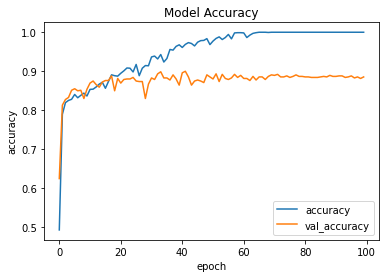

In [ ]:
# Model accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

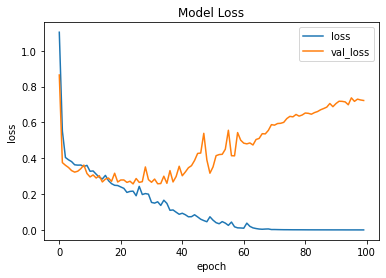

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])
plt.show()

In [9]:
preds = np.round(model.predict(y_val),0)
print('rounded val_label', preds)

NameError: ignored

In [16]:
from sklearn.metrics import classification_report
from sklearn import metrics

leaf = ['cercospora', 'commonrust', 'normal','northernleafblight']
classification_metrics = metrics.classification_report(val_label, preds, target_names=leaf)
print(classification_metrics)

ValueError: ignored

In [ ]:
y_test_arg=np.argmax(x_val,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))